In [386]:
# Data manipulation
import pandas as pd
import numpy as np
import pyarrow

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Plot aesthetics
color_pal = sns.color_palette()
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb  # ML algorithm for forecasting
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Error metrics

In [387]:
import time

# Record the start time
start_time = time.time()

Referenced from: https://github.com/jpsam07/skyline-hospital-time-series-forecasting-with-xgboost?tab=readme-ov-file#data-collection

In [388]:
filepath = 'sample-data/term_dates_parking.csv' # change as needed

df = pd.read_csv(filepath)

df.head()


,Timestamp,North,West,Rose,Health Sciences,Fraser,Thunderbird,University Lot Blvd,temp,visibility,...,weather_Snow_light shower snow,weather_Snow_light snow,weather_Snow_sleet,weather_Snow_snow,weather_Thunderstorm_thunderstorm,weather_Thunderstorm_thunderstorm with heavy rain,weather_Thunderstorm_thunderstorm with light rain,weather_Thunderstorm_thunderstorm with rain,term_date,is_holiday
0,2018-09-06 10:00:00,951,1016,476,913,556,939,0,14.59,10000.0,...,False,False,False,False,False,False,False,False,False,False
1,2018-09-06 11:00:00,922,1160,609,972,707,1050,0,14.01,10000.0,...,False,False,False,False,False,False,False,False,False,False
2,2018-09-06 12:00:00,833,1206,659,963,724,1072,0,14.16,10000.0,...,False,False,False,False,False,False,False,False,False,False
3,2018-09-06 13:00:00,851,1168,695,953,719,1094,0,13.85,10000.0,...,False,False,False,False,False,False,False,False,False,False
4,2018-09-06 14:00:00,857,1220,710,963,727,1069,0,13.96,10000.0,...,False,False,False,False,False,False,False,False,False,False


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39398 entries, 0 to 39397
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Timestamp                                          39398 non-null  object 
 1   North                                              39398 non-null  int64  
 2   West                                               39398 non-null  int64  
 3   Rose                                               39398 non-null  int64  
 4   Health Sciences                                    39398 non-null  int64  
 5   Fraser                                             39398 non-null  int64  
 6   Thunderbird                                        39398 non-null  int64  
 7   University Lot Blvd                                39398 non-null  int64  
 8   temp                                               39398 non-null  float64
 9   visibi

In [390]:
df.rename(columns={'Timestamp': 'date'}, inplace=True)
df = df.set_index('date')
df

,North,West,Rose,Health Sciences,Fraser,Thunderbird,University Lot Blvd,temp,visibility,dew_point,...,weather_Snow_light shower snow,weather_Snow_light snow,weather_Snow_sleet,weather_Snow_snow,weather_Thunderstorm_thunderstorm,weather_Thunderstorm_thunderstorm with heavy rain,weather_Thunderstorm_thunderstorm with light rain,weather_Thunderstorm_thunderstorm with rain,term_date,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,951,1016,476,913,556,939,0,14.59,10000.0,10.21,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 11:00:00,922,1160,609,972,707,1050,0,14.01,10000.0,9.85,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 12:00:00,833,1206,659,963,724,1072,0,14.16,10000.0,10.58,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 13:00:00,851,1168,695,953,719,1094,0,13.85,10000.0,9.70,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 14:00:00,857,1220,710,963,727,1069,0,13.96,10000.0,9.41,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,72,232,154,172,119,217,64,3.21,10000.0,-0.53,...,False,False,False,False,False,False,False,False,False,False
2024-03-05 20:00:00,10,146,100,91,70,164,43,4.18,10000.0,-1.41,...,False,False,False,False,False,False,False,False,False,False
2024-03-05 21:00:00,0,88,44,62,43,121,34,4.17,10000.0,-1.06,...,False,False,False,False,False,False,False,False,False,False


In [391]:
# Convert sensor columns to numeric (in case they are not already)
# df['sensor'] = df.iloc[:, 0:10].mean(axis=1)
#df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the average across sensor columns
# df['sensor'] = df.iloc[:, 1:].mean(axis=1)

# Drop the individual sensor columns
# df.drop(columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], inplace=True)

# Display the updated DataFrame
parking_lot_to_predict = 'University Lot Blvd'
df.rename(columns={parking_lot_to_predict: 'Occupancy'}, inplace=True)

parking_lots = ['North','West', 'Rose', 'Health Sciences', 'Fraser', 'Thunderbird', 'University Lot Blvd']
parking_lots.remove(parking_lot_to_predict)
df.drop(columns=parking_lots, inplace=True)
print(df.head())


                     Occupancy   temp  visibility  dew_point  feels_like  \
date                                                                       
2018-09-06 10:00:00          0  14.59     10000.0      10.21       14.06   
2018-09-06 11:00:00          0  14.01     10000.0       9.85       13.45   
2018-09-06 12:00:00          0  14.16     10000.0      10.58       13.69   
2018-09-06 13:00:00          0  13.85     10000.0       9.70       13.28   
2018-09-06 14:00:00          0  13.96     10000.0       9.41       13.34   

                     pressure  humidity  wind_speed  clouds_all  rain_1h  ...  \
date                                                                      ...   
2018-09-06 10:00:00      1015        75        1.03          20      NaN  ...   
2018-09-06 11:00:00      1016        76        0.00          40      NaN  ...   
2018-09-06 12:00:00      1016        79        2.10          75      NaN  ...   
2018-09-06 13:00:00      1016        76        2.10          3

In [392]:
old_df = df
# Calculate the 95th percentile of the 'Occupancy' column
threshold = df['Occupancy'].quantile(1)

# Filter the DataFrame to exclude values above the threshold
df = df[df['Occupancy'] <= threshold]

# Display the filtered DataFrame
print(df)

                     Occupancy   temp  visibility  dew_point  feels_like  \
date                                                                       
2018-09-06 10:00:00          0  14.59     10000.0      10.21       14.06   
2018-09-06 11:00:00          0  14.01     10000.0       9.85       13.45   
2018-09-06 12:00:00          0  14.16     10000.0      10.58       13.69   
2018-09-06 13:00:00          0  13.85     10000.0       9.70       13.28   
2018-09-06 14:00:00          0  13.96     10000.0       9.41       13.34   
...                        ...    ...         ...        ...         ...   
2024-03-05 19:00:00         64   3.21     10000.0      -0.53        1.22   
2024-03-05 20:00:00         43   4.18     10000.0      -1.41        0.78   
2024-03-05 21:00:00         34   4.17     10000.0      -1.06        0.49   
2024-03-05 22:00:00         20   4.57     10000.0      -1.45        1.26   
2024-03-05 23:00:00         19   4.68     10000.0      -1.55        2.46   

           

In [393]:
df = df.copy()
df['date'] = pd.to_datetime(df.index)
df['day_of_week'] = df['date'].dt.dayofweek
print(df.head())

print(df.tail())

                     Occupancy   temp  visibility  dew_point  feels_like  \
date                                                                       
2018-09-06 10:00:00          0  14.59     10000.0      10.21       14.06   
2018-09-06 11:00:00          0  14.01     10000.0       9.85       13.45   
2018-09-06 12:00:00          0  14.16     10000.0      10.58       13.69   
2018-09-06 13:00:00          0  13.85     10000.0       9.70       13.28   
2018-09-06 14:00:00          0  13.96     10000.0       9.41       13.34   

                     pressure  humidity  wind_speed  clouds_all  rain_1h  ...  \
date                                                                      ...   
2018-09-06 10:00:00      1015        75        1.03          20      NaN  ...   
2018-09-06 11:00:00      1016        76        0.00          40      NaN  ...   
2018-09-06 12:00:00      1016        79        2.10          75      NaN  ...   
2018-09-06 13:00:00      1016        76        2.10          3

<Axes: xlabel='day_of_week'>

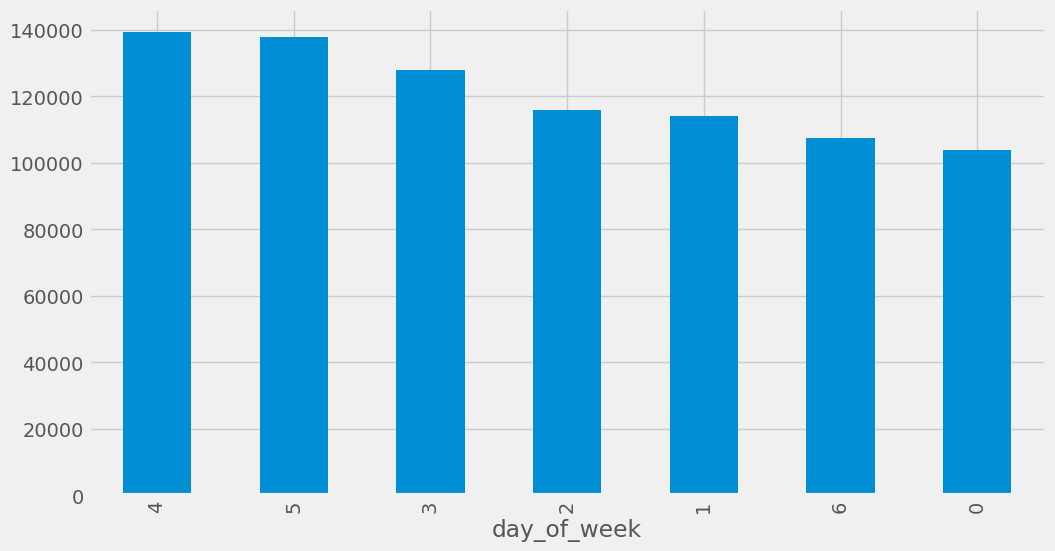

In [394]:
df.groupby('day_of_week')['Occupancy'].sum().sort_values(ascending=False) \
    .plot(kind='bar', figsize=(11, 6))


In [395]:
from statsmodels.tsa.seasonal import STL

In [396]:
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Assuming 'Occupancy' is the column containing the Occupancy data
traffic_series = df['Occupancy']

# Step 1: Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Step 2: Extract 'Occupancy' as a pandas Series
traffic_series = df['Occupancy']



In [397]:

# Step 3: Convert the data type of the Series to numeric (if needed)
traffic_series = pd.to_numeric(traffic_series, errors='coerce')

traffic_series.head()




date
2018-09-06 10:00:00    0
2018-09-06 11:00:00    0
2018-09-06 12:00:00    0
2018-09-06 13:00:00    0
2018-09-06 14:00:00    0
Name: Occupancy, dtype: int64

In [398]:
traffic_series.tail()

date
2024-03-05 19:00:00    64
2024-03-05 20:00:00    43
2024-03-05 21:00:00    34
2024-03-05 22:00:00    20
2024-03-05 23:00:00    19
Name: Occupancy, dtype: int64

In [399]:
'''
# Perform STL decomposition
# stl = STL(traffic_series, seasonal= 24 * 7)  # Assuming hourly data with weekly seasonality
result = stl.fit()

print(stl, result, sep='\n')
'''

"\n# Perform STL decomposition\n# stl = STL(traffic_series, seasonal= 24 * 7)  # Assuming hourly data with weekly seasonality\nresult = stl.fit()\n\nprint(stl, result, sep='\n')\n"

In [400]:
'''
# Plot the components
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=3)

# Observed component
result.observed.plot(ax=ax[0], legend=False)
ax[0].set_title('Observed')

# Trend component
result.trend.plot(ax=ax[1], legend=False)
ax[1].set_title('Trend')

# Seasonal component
result.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_title('Seasonal')

# Residual component
result.resid.plot(ax=ax[3], legend=False)
ax[3].set_title('Residual')

# Show plot
plt.show()
'''

"\n# Plot the components\nfig, ax = plt.subplots(4, 1, figsize=(12, 8))\nplt.subplots_adjust(hspace=3)\n\n# Observed component\nresult.observed.plot(ax=ax[0], legend=False)\nax[0].set_title('Observed')\n\n# Trend component\nresult.trend.plot(ax=ax[1], legend=False)\nax[1].set_title('Trend')\n\n# Seasonal component\nresult.seasonal.plot(ax=ax[2], legend=False)\nax[2].set_title('Seasonal')\n\n# Residual component\nresult.resid.plot(ax=ax[3], legend=False)\nax[3].set_title('Residual')\n\n# Show plot\nplt.show()\n"

In [401]:
'''
# Calculate the 25th and 75th quantiles and the IQR
Q1 = traffic_series.quantile(0.25)
Q3 = traffic_series.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 0.1 * IQR
upper_bound = Q3 + 0.9 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
'''

"\n# Calculate the 25th and 75th quantiles and the IQR\nQ1 = traffic_series.quantile(0.25)\nQ3 = traffic_series.quantile(0.75)\nIQR = Q3 - Q1\n\n# Calculate the lower and upper bounds\nlower_bound = Q1 - 0.1 * IQR\nupper_bound = Q3 + 0.9 * IQR\n\nprint(f'Lower Bound: {lower_bound}')\nprint(f'Upper Bound: {upper_bound}')\n"

In [402]:
'''
def custom_winsorize(x):
    if x < lower_bound:
        return lower_bound
    elif x > upper_bound:
        return upper_bound
    else:
        return x

cleaned_series = traffic_series.copy()
cleaned_series = cleaned_series.apply(custom_winsorize)
df['Occupancy'] = cleaned_series.copy()
'''

"\ndef custom_winsorize(x):\n    if x < lower_bound:\n        return lower_bound\n    elif x > upper_bound:\n        return upper_bound\n    else:\n        return x\n\ncleaned_series = traffic_series.copy()\ncleaned_series = cleaned_series.apply(custom_winsorize)\ndf['Occupancy'] = cleaned_series.copy()\n"

In [403]:
'''
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the winsorized time series data
ax.plot(df.index, 'Occupancy', data=df,
       label='Occupancy Rate')

# Plot title and labels
ax.set_title('Winsorized Occupancy')
ax.set_xlabel('Date')
ax.set_ylabel('Occupancy')

# Show legend
plt.legend()

# Show plot
plt.show()
'''

"\n# Create figure and axis\nfig, ax = plt.subplots(figsize=(12, 6))\n\n# Plot the winsorized time series data\nax.plot(df.index, 'Occupancy', data=df,\n       label='Occupancy Rate')\n\n# Plot title and labels\nax.set_title('Winsorized Occupancy')\nax.set_xlabel('Date')\nax.set_ylabel('Occupancy')\n\n# Show legend\nplt.legend()\n\n# Show plot\nplt.show()\n"

In [404]:


def create_features(df, label=None):
    """
    Create time series features from the datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_week'] = df['date'].dt.dayofweek
    df['hour'] = df['date'].dt.hour  # Add hour feature
    
    window_size = 7  # 7-day rolling window
    
    # Rolling minimum
    df['rolling_min'] = df['Occupancy'].rolling(window=window_size).min()
    
    # Rolling maximum
    df['rolling_max'] = df['Occupancy'].rolling(window=window_size).max()
    
    # Rolling sum
    df['rolling_sum'] = df['Occupancy'].rolling(window=window_size).sum()
    
    # Rollling mean
    df['rolling_mean'] = df['Occupancy'].rolling(window=window_size).mean()
    
    # Rolling median
    df['rolling_median'] = df['Occupancy'].rolling(window=window_size).median()
    
    # Rolling standard deviation
    df['rolling_std'] = df['Occupancy'].rolling(window=window_size).std()
    
    # Rolling 25th percentile
    df['rolling_quantile_25'] = df['Occupancy'].rolling(window=window_size).quantile(0.25)
    
    # Rolling 75th percentile
    df['rolling_quantile_75'] = df['Occupancy'].rolling(window=window_size).quantile(0.75)
    
    return df

# Example usage
df = create_features(df)
df.dtypes


Occupancy                                                     int64
temp                                                        float64
visibility                                                  float64
dew_point                                                   float64
feels_like                                                  float64
pressure                                                      int64
humidity                                                      int64
wind_speed                                                  float64
clouds_all                                                    int64
rain_1h                                                     float64
snow_1h                                                     float64
weather_Clear_sky is clear                                     bool
weather_Clouds_broken clouds                                   bool
weather_Clouds_few clouds                                      bool
weather_Clouds_overcast clouds                  

In [405]:
df.to_csv("test.csv")

In [406]:
# Replace negative values in 'Occupancy' column with 0
df.loc[df['Occupancy'] < 0, 'Occupancy'] = 0


In [407]:
from sklearn.model_selection import TimeSeriesSplit

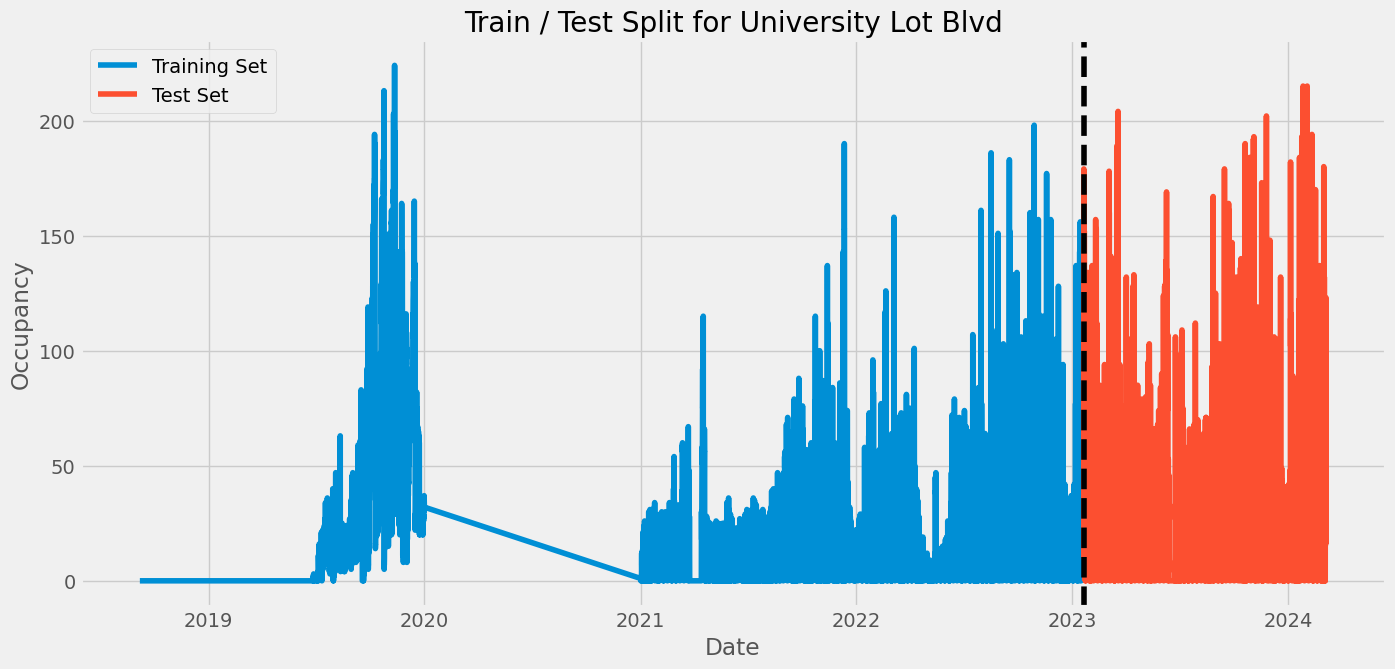

In [408]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
train_size = 0.75
train, test = train_test_split(df, test_size=(1 - train_size), shuffle=False)

# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(train.index, train['Occupancy'], label='Training Set')
plt.plot(test.index, test['Occupancy'], label='Test Set')
plt.axvline(test.index.min(), color='black', ls='--')
plt.title(f'Train / Test Split for {parking_lot_to_predict}')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()


In [409]:
df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,day_of_year,hour,rolling_min,rolling_max,rolling_sum,rolling_mean,rolling_median,rolling_std,rolling_quantile_25,rolling_quantile_75
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,0,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,249,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,0,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,249,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,0,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,249,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,0,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,249,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,0,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,249,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,64,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,65,19,64.0,123.0,663.0,94.714286,92.0,20.475305,83.0,109.0
2024-03-05 20:00:00,43,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,65,20,43.0,123.0,601.0,85.857143,88.0,27.491990,71.0,102.5
2024-03-05 21:00:00,34,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,65,21,34.0,113.0,512.0,73.142857,78.0,28.026348,53.5,90.0


In [410]:
def add_lags(df):
    """
    Create time lags for added time series features and allow the model to learn the temporal structure of the data.
    """
    target_map = df['Occupancy'].to_dict()
    df['lag_1_hour'] = (df.index - pd.Timedelta('1 hours')).map(target_map)
    df['lag_2_hours'] = (df.index - pd.Timedelta('2 hours')).map(target_map)
    df['lag_3_hours'] = (df.index - pd.Timedelta('3 hours')).map(target_map)

    df['lag_7_days'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    df['lag_14_days'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    df['lag_21_days'] = (df.index - pd.Timedelta('21 days')).map(target_map)
    df['lag_28_days'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    df['lag_30_days'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    df['lag_35_days'] = (df.index - pd.Timedelta('35 days')).map(target_map)
    df['lag_42_days'] = (df.index - pd.Timedelta('42 days')).map(target_map)
    df['lag_49_days'] = (df.index - pd.Timedelta('49 days')).map(target_map)
    df['lag_56_days'] = (df.index - pd.Timedelta('56 days')).map(target_map)
    df['lag_60_days'] = (df.index - pd.Timedelta('60 days')).map(target_map)

     # Daily lags
    for lag_days in range(1, 7):  # lags for 1 to 6 days
        df[f'lag_{lag_days}_days'] = (df.index - pd.Timedelta(f'{lag_days} days')).map(target_map)
    
    return df

df = add_lags(df)
df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,0,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,0,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,0,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,0,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,0,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,64,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,61.0,41.0,32.0,114.0,110.0,55.0,132.0,180.0,84.0,115.0
2024-03-05 20:00:00,43,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,45.0,18.0,25.0,112.0,53.0,52.0,84.0,92.0,48.0,83.0
2024-03-05 21:00:00,34,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,39.0,11.0,20.0,82.0,34.0,29.0,52.0,58.0,39.0,56.0


In [411]:
# Define error metrics

# Root mean squared error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Replace zero values in y_true with a small constant to avoid division by zero
    epsilon = 1e-10
    y_true_nonzero = np.where(y_true == 0, epsilon, y_true)
    
    # Calculate MAPE
    return np.mean(np.abs((y_true_nonzero - y_pred) / y_true_nonzero)) * 100

# Symmetric mean absolute percentage error (sMAPE)
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

# Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2)

In [412]:
df.columns

Index(['Occupancy', 'temp', 'visibility', 'dew_point', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'rain_1h',
       'snow_1h', 'weather_Clear_sky is clear', 'weather_Clouds_broken clouds',
       'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds',
       'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle',
       'weather_Drizzle_light intensity drizzle',
       'weather_Drizzle_light intensity drizzle rain',
       'weather_Drizzle_rain and drizzle', 'weather_Dust_dust',
       'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist',
       'weather_Rain_heavy intensity rain',
       'weather_Rain_heavy intensity shower rain',
       'weather_Rain_light intensity shower rain', 'weather_Rain_light rain',
       'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain',
       'weather_Rain_shower rain', 'weather_Rain_very heavy rain',
       'weather_Smoke_smoke', 'weather_Snow_heavy snow',
       'weather_Snow_light rain a

In [413]:
df.dtypes

Occupancy       int64
temp          float64
visibility    float64
dew_point     float64
feels_like    float64
               ...   
lag_2_days    float64
lag_3_days    float64
lag_4_days    float64
lag_5_days    float64
lag_6_days    float64
Length: 78, dtype: object

In [414]:
df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,0,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,0,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,0,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,0,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,0,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,64,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,61.0,41.0,32.0,114.0,110.0,55.0,132.0,180.0,84.0,115.0
2024-03-05 20:00:00,43,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,45.0,18.0,25.0,112.0,53.0,52.0,84.0,92.0,48.0,83.0
2024-03-05 21:00:00,34,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,39.0,11.0,20.0,82.0,34.0,29.0,52.0,58.0,39.0,56.0


In [415]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming df is your DataFrame and create_features is a function to generate features
train, test = train_test_split(df, test_size=(1-train_size), shuffle=False)

train = create_features(train)
test = create_features(test)

# Make empty lists for the error metric scores
rmse_scores = []
mape_scores = []
smape_scores = []
mae_scores = []
mse_scores = []

# Define the target variable and the column to exclude
TARGET = 'Occupancy'
EXCLUDE_COLUMNS = ['date', TARGET]

# Generate the list of features
FEATURES = [col for col in df.columns if col not in EXCLUDE_COLUMNS]
# weather features
# FEATURES = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'rain_1h', 'snow_1h', 'weather_Clear_sky is clear', 'weather_Clouds_broken clouds', 'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds', 'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle', 'weather_Drizzle_light intensity drizzle', 'weather_Drizzle_light intensity drizzle rain', 'weather_Drizzle_rain and drizzle', 'weather_Dust_dust', 'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist', 'weather_Rain_heavy intensity rain', 'weather_Rain_heavy intensity shower rain', 'weather_Rain_light intensity shower rain', 'weather_Rain_light rain', 'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain', 'weather_Rain_shower rain', 'weather_Rain_very heavy rain', 'weather_Smoke_smoke', 'weather_Snow_heavy snow', 'weather_Snow_light rain and snow', 'weather_Snow_light shower sleet', 'weather_Snow_light shower snow', 'weather_Snow_light snow', 'weather_Snow_sleet', 'weather_Snow_snow', 'weather_Thunderstorm_thunderstorm', 'weather_Thunderstorm_thunderstorm with heavy rain', 'weather_Thunderstorm_thunderstorm with light rain', 'weather_Thunderstorm_thunderstorm with rain']


print(FEATURES)


['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'rain_1h', 'snow_1h', 'weather_Clear_sky is clear', 'weather_Clouds_broken clouds', 'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds', 'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle', 'weather_Drizzle_light intensity drizzle', 'weather_Drizzle_light intensity drizzle rain', 'weather_Drizzle_rain and drizzle', 'weather_Dust_dust', 'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist', 'weather_Rain_heavy intensity rain', 'weather_Rain_heavy intensity shower rain', 'weather_Rain_light intensity shower rain', 'weather_Rain_light rain', 'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain', 'weather_Rain_shower rain', 'weather_Rain_very heavy rain', 'weather_Smoke_smoke', 'weather_Snow_heavy snow', 'weather_Snow_light rain and snow', 'weather_Snow_light shower sleet', 'weather_Snow_light shower snow', 'weather_Snow_light snow', 'weather_Snow_slee

In [416]:

'''
FEATURES = ['hour','day_of_week', 'month', 'day_of_year', 'rolling_min', 'rolling_max',
            'rolling_sum', 'rolling_mean', 'rolling_median', 'rolling_std', 'rolling_quantile_25',
            'rolling_quantile_75', 'lag_7_days', 'lag_14_days', 'lag_21_days', 'lag_28_days', 
            'lag_30_days', 'lag_35_days', 'lag_42_days', 'lag_49_days', 'lag_56_days', 'lag_60_days',
            'lag_1_hour', 'lag_2_hours', 'lag_3_hours',
            'lag_1_days', 'lag_2_days', 'lag_3_days', 'lag_4_days', 'lag_5_days','lag_6_days',
            ] + WEATHER_FEATURES

'''

TARGET = 'Occupancy'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = lgb.LGBMRegressor(boosting_type='gbdt', 
                        n_estimators=900, 
                        early_stopping_rounds=50,
                        objective='regression', 
                        max_depth=3, 
                        min_child_samples=3, 
                        learning_rate=0.01, 
                        colsample_bytree=0.9, 
                        subsample=0.7,
                        reg_lambda=0)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

y_pred = reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate additional metrics if needed
mape = mean_absolute_percentage_error(y_test, y_pred)
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

# Store the scores
rmse_scores.append(rmse)
mape_scores.append(mape)
smape_scores.append(smape)
mae_scores.append(mae)
mse_scores.append(mse)

# Store actual and predicted values along with their datetime index in the DataFrame
actual_vs_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=test.index)


[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7123
[LightGBM] [Info] Number of data points in the train set: 29548, number of used features: 62
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 17.487918
Training until validation scores don't improve for 50 rounds


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [417]:
# Print the error metric results
print(f'RMSE across folds: {np.mean(rmse_scores):.16f}')
#print(f'MAPE across folds: {np.mean(mape_scores):.3f}%')
#print(f'sMAPE across folds: {np.mean(smape_scores):.3f}%')
print(f'MAE across folds: {np.mean(mae_scores):.16f}')
print(f'MSE across folds: {np.mean(mse_scores):.16f}')

RMSE across folds: 9.4957678812086588
MAE across folds: 5.6378272680837709
MSE across folds: 90.1696076537939888


In [418]:
actual_vs_pred_df.to_csv('actual_vs_predicted.csv', index=True)

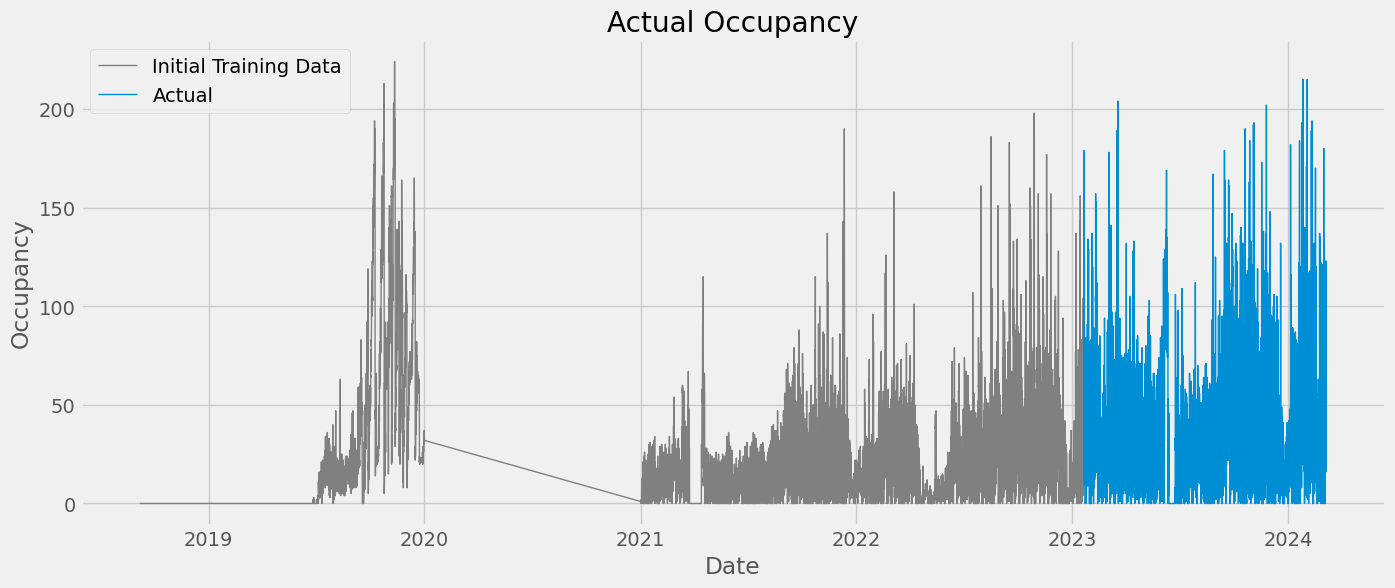

In [419]:
# Create figure
plt.figure(figsize=(15, 6))

# Plot the initial training data
plt.plot(train.index, train['Occupancy'], label='Initial Training Data', color='gray', linewidth=1)

# Plot for the actual and predicted values
plt.plot(actual_vs_pred_df.index, actual_vs_pred_df['Actual'], label='Actual', linewidth=1)

# Plot labels and title
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.title('Actual Occupancy')

# Show legend
plt.legend()

# Show plot
plt.show()


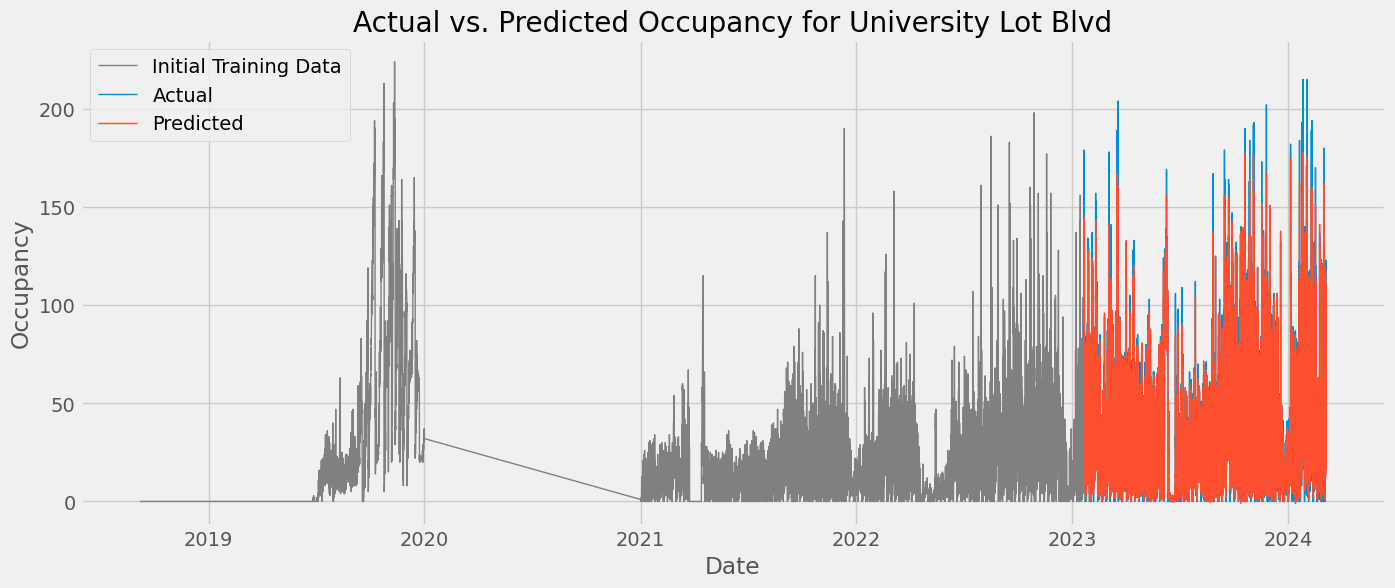

In [420]:
# Create figure
plt.figure(figsize=(15, 6))

# Plot the initial training data
plt.plot(train.index, train['Occupancy'], label='Initial Training Data', color='gray', linewidth=1)

# Plot for the actual and predicted values
plt.plot(actual_vs_pred_df.index, actual_vs_pred_df['Actual'], label='Actual', linewidth=1)
plt.plot(actual_vs_pred_df.index, actual_vs_pred_df['Predicted'], label='Predicted', linewidth=1)

# Plot labels and title
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.title(f'Actual vs. Predicted Occupancy for {parking_lot_to_predict}')

# Show legend
plt.legend()

# Show plot
plt.show()


In [421]:
# Record the end time
end_time = time.time()

# Calculate the total run time
total_run_time = end_time - start_time
print("Total run time:", total_run_time, "seconds")

Total run time: 8.767517328262329 seconds


In [422]:
# Retrain on all the data
df = create_features(df)

TARGET = 'Occupancy'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = lgb.LGBMRegressor(boosting_type='gbdt', 
                        n_estimators=900, 
                        early_stopping_rounds=50,
                        objective='regression', 
                        max_depth=3, 
                        min_child_weight=3, 
                        learning_rate=0.01, 
                        colsample_bytree=0.9, 
                        subsample=0.7,
                        reg_lambda=0)

reg.fit(X_all, y_all, eval_set=[(X_all, y_all)])

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7389
[LightGBM] [Info] Number of data points in the train set: 39398, number of used features: 60
[LightGBM] [Info] Start training from score 21.484974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

LGBMRegressor(colsample_bytree=0.9, early_stopping_rounds=50,
              learning_rate=0.01, max_depth=3, min_child_weight=3,
              n_estimators=900, objective='regression', reg_lambda=0,
              subsample=0.7)

In [423]:
df.index.max()

Timestamp('2024-03-05 23:00:00')

In [424]:
first_date_time = df.iloc[0]['date']
last_date_time = df.iloc[-1]['date']
#print(last_date_time)

new_date_time = last_date_time + pd.DateOffset(months=3)
#print(new_date_time)

first_date_time_str = first_date_time.strftime('%Y-%m-%d %H:%M:%S')
last_date_time_str = last_date_time.strftime('%Y-%m-%d %H:%M:%S')
new_date_time_str = new_date_time.strftime('%Y-%m-%d %H:%M:%S')
print(first_date_time_str)
print(last_date_time_str)
#print(new_date_time_str)

2018-09-06 10:00:00
2024-03-05 23:00:00


In [425]:
future = pd.date_range('2022-12-31', '2023-06-28', freq='D')
future_df = pd.DataFrame(index=future)

df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
2018-09-06 10:00:00,0.0,14.59,10000.0,10.21,14.06,1015.0,75.0,1.03,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,0.0,14.01,10000.0,9.85,13.45,1016.0,76.0,0.00,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,0.0,14.16,10000.0,10.58,13.69,1016.0,79.0,2.10,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,0.0,13.85,10000.0,9.70,13.28,1016.0,76.0,2.10,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,0.0,13.96,10000.0,9.41,13.34,1017.0,74.0,2.60,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [426]:
# Create future DataFrame with hourly frequency
future = pd.date_range(start=last_date_time_str, end=new_date_time_str, freq='D')
future_df = pd.DataFrame(index=future)

future_df['isFuture'] = True
df['isFuture'] = False

df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

df
#df_and_future


,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days,isFuture
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,0,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2018-09-06 11:00:00,0,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2018-09-06 12:00:00,0,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2018-09-06 13:00:00,0,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2018-09-06 14:00:00,0,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,64,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,41.0,32.0,114.0,110.0,55.0,132.0,180.0,84.0,115.0,False
2024-03-05 20:00:00,43,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,18.0,25.0,112.0,53.0,52.0,84.0,92.0,48.0,83.0,False
2024-03-05 21:00:00,34,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,11.0,20.0,82.0,34.0,29.0,52.0,58.0,39.0,56.0,False


In [427]:
future_with_features = df_and_future.query('isFuture').copy()


In [428]:
future_with_features.head()

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days,isFuture
2024-03-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,14.0,27.0,27.0,2.0,22.0,51.0,13.0,28.0,True
2024-03-06 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,17.0,NaN,27.0,2.0,22.0,51.0,13.0,True
2024-03-07 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,5.0,18.0,NaN,NaN,27.0,2.0,22.0,51.0,True
2024-03-08 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,25.0,17.0,NaN,NaN,NaN,27.0,2.0,22.0,True
2024-03-09 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,0.0,14.0,NaN,NaN,NaN,NaN,27.0,2.0,True


In [429]:
future_with_features.tail()

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days,isFuture
2024-06-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-06-02 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-06-03 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-06-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-06-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [430]:
feature_importances = reg.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance = pd.DataFrame(data=feature_importances, index=X_train.columns, columns=['importance'])

# Print the DataFrame
print(feature_importance)

            importance
temp                 0
visibility           0
dew_point           14
feels_like           1
pressure             0
...                ...
lag_2_days          97
lag_3_days          17
lag_4_days          27
lag_5_days          12
lag_6_days          23

[76 rows x 1 columns]


In [431]:
X_train.columns

Index(['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'rain_1h', 'snow_1h',
       'weather_Clear_sky is clear', 'weather_Clouds_broken clouds',
       'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds',
       'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle',
       'weather_Drizzle_light intensity drizzle',
       'weather_Drizzle_light intensity drizzle rain',
       'weather_Drizzle_rain and drizzle', 'weather_Dust_dust',
       'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist',
       'weather_Rain_heavy intensity rain',
       'weather_Rain_heavy intensity shower rain',
       'weather_Rain_light intensity shower rain', 'weather_Rain_light rain',
       'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain',
       'weather_Rain_shower rain', 'weather_Rain_very heavy rain',
       'weather_Smoke_smoke', 'weather_Snow_heavy snow',
       'weather_Snow_light rain and snow', 'we

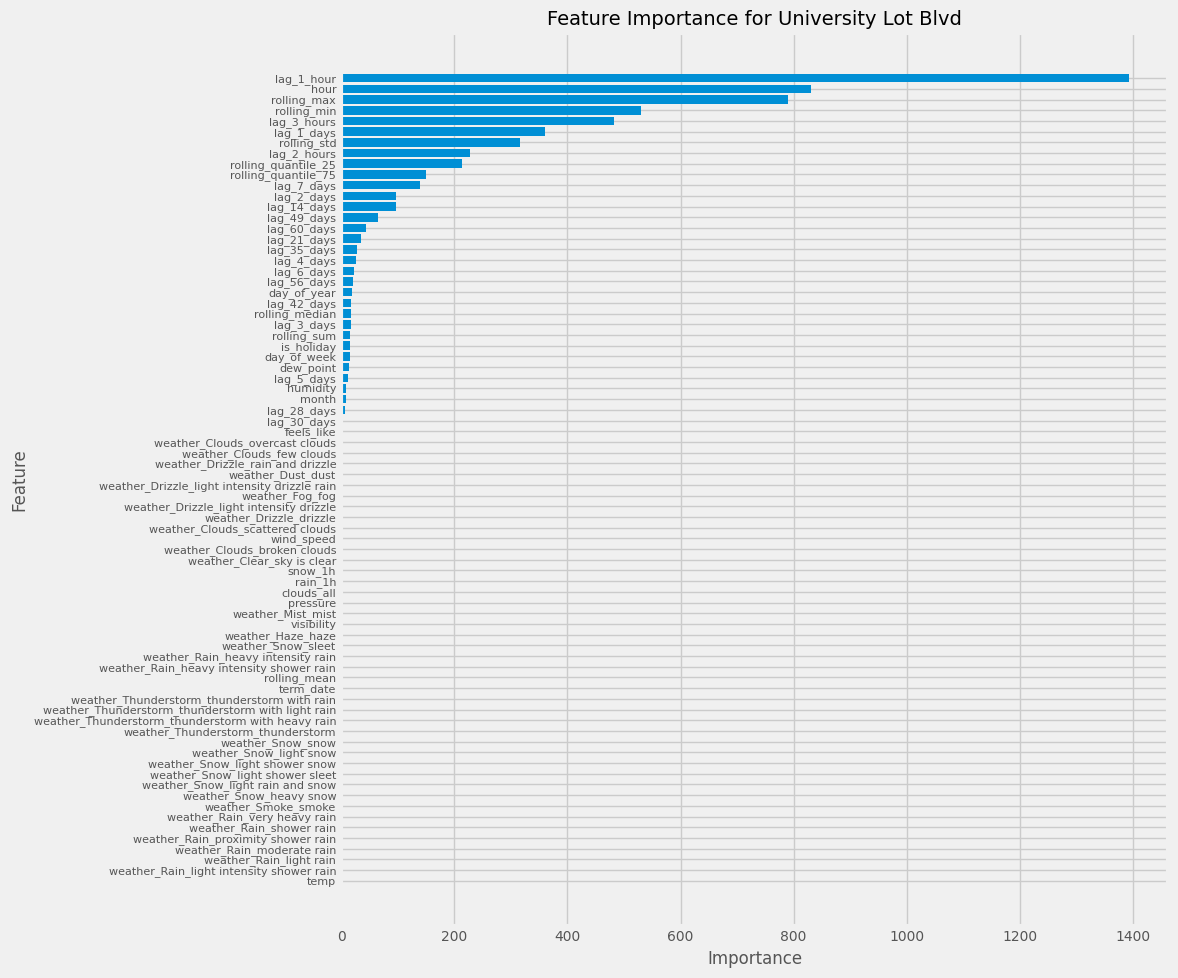

In [432]:
import matplotlib.pyplot as plt

# Sort the feature importances in ascending order
sorted_feature_importance = feature_importance.sort_values('importance')

# Plot the sorted feature importances
plt.figure(figsize=(12, 10))
barplot = plt.barh(sorted_feature_importance.index, sorted_feature_importance['importance'])

# Adjust font size for each y-axis label individually
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(8)

plt.xlabel('Importance', fontsize=12)  # Adjust font size for x-label
plt.ylabel('Feature', fontsize=12)  # Adjust font size for y-label
plt.title(f'Feature Importance for {parking_lot_to_predict}', fontsize=14)  # Adjust font size for title
# Adjust font size for x-axis ticks
plt.xticks(fontsize=10)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
